# All these sick animals

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Open your dataset up using pandas in a Jupyter notebook

Switzerland does [publish statistics](https://www.infosm.blv.admin.ch/public/) about deseases by animals. I downloaded the statistics for the canton of Bern. Since the file was encoded in ISO-8859 I had to convert it to UTF8 using the following linux command: iconv-f ISO-8859-1 infile.csv -t UTF8 -o outfile.csv.

In [5]:
df = pd.read_csv("sickanimals.csv", sep=";", header=0)

## Do a .head() to get a feel for your data

In [6]:
df.head()

,diagnosedatum,kanton,bezirk,gemeinde,seuchengruppe,tierseuche,tierart,tierkategorie,anzahlinfizierterfaelle,anzahlgetoetefaelle
0,01.12.2006,Bern,Schwarzenburg,Albligen,Zu bekämpfende Seuchen,Schafräude (2009 aus TSV gestrichen),Schaf,NaN,0,0
1,12.12.2006,Bern,Burgdorf,Kernenried,Auszurottende Seuchen,Bovine Virus Diarrhoe / Mucosal Disease (BVD /...,Rind,NaN,1,0
2,12.12.2006,Bern,Trachselwald,Rüegsau,Auszurottende Seuchen,Bovine Virus Diarrhoe / Mucosal Disease (BVD /...,Rind,NaN,1,0
3,13.12.2006,Bern,Courtelary,Courtelary,Zu überwachende Seuchen,Kryptosporidiose,Rind,NaN,1,0
4,07.12.2006,Bern,Trachselwald,Sumiswald,Zu überwachende Seuchen,Kryptosporidiose,Rind,NaN,1,0


## Write down 12 questions to ask your data, or 12 things to hunt for in the data.

- What incidies affected the highest number of animals?
- How many animals were killed in total?
- What were the most lethal incidies?
- What are the most transferable deseases that led to the most killed animals? 
- In what villages and towns did most incidents happen? 
- What incidents occured in the town Aarberg?
- What animals are the sickest?
- When did the "Kryptosporidiose" diseases happen in the municipality Courtelary?
- What are the most recent 10 incidies in the database?
- What are the first 10 incidies in the database?
- On what day did they count the largest number of sick animals? 
- What deseases are on record for June 23 2014?

## What incidies affected the highest number of animals?

In [10]:
df[['tierseuche', 'tierart', 'anzahlinfizierterfaelle']].sort_values(by='anzahlinfizierterfaelle', ascending = False).head(10)

,tierseuche,tierart,anzahlinfizierterfaelle
471,Salmonella-Enteritidis-Infektion der Hühner (b...,Huhn,760
293,Schafräude (2009 aus TSV gestrichen),Schaf,70
4445,Enzootische Pneumonie der Schweine,Schwein,60
2537,Sauerbrut der Bienen,Bienen,54
812,Faulbrut der Bienen,Bienen,34
4039,Bovine Virus Diarrhoe / Mucosal Disease (BVD /...,Rind,30
1502,Sauerbrut der Bienen,Bienen,29
4617,Proliferative Nierenkrankheit der Fische,Fisch,25
2540,Sauerbrut der Bienen,Bienen,20
218,Sauerbrut der Bienen,Bienen,20


## How many animals were killed in total?

In [113]:
df['anzahlgetoetefaelle'].sum()

11712

## What were the most lethal incidies?

In [11]:
df[['tierseuche', 'tierart', 'anzahlgetoetefaelle']].sort_values(by='anzahlgetoetefaelle', ascending = False).head(10)

,tierseuche,tierart,anzahlgetoetefaelle
7480,Salmonella-Infektion des Geflügels und der Sch...,Huhn,4900
8135,Salmonella-Infektion des Geflügels und der Sch...,Huhn,3000
326,Salmonella-Enteritidis-Infektion der Hühner (b...,Huhn,2000
471,Salmonella-Enteritidis-Infektion der Hühner (b...,Huhn,760
739,Klassische Schweinepest,Schwein,400
740,Klassische Schweinepest,Schwein,174
7854,Klassische Schweinepest,Schwein,89
4445,Enzootische Pneumonie der Schweine,Schwein,60
4039,Bovine Virus Diarrhoe / Mucosal Disease (BVD /...,Rind,30
1158,Salmonellose,Huhn,12


## What are the most transferable deseases that led to the most killed animals? 

In [18]:
df[df['seuchengruppe'] == 'Hochansteckende Seuchen'].sort_values('anzahlgetoetefaelle', ascending=False).head(3)

,diagnosedatum,kanton,bezirk,gemeinde,seuchengruppe,tierseuche,tierart,tierkategorie,anzahlinfizierterfaelle,anzahlgetoetefaelle
739,15.06.1993,Bern,Signau,NaN,Hochansteckende Seuchen,Klassische Schweinepest,Schwein,NaN,0,400
740,15.12.1993,Bern,Burgdorf,NaN,Hochansteckende Seuchen,Klassische Schweinepest,Schwein,NaN,0,174
7854,15.10.1993,Bern,Bern,NaN,Hochansteckende Seuchen,Klassische Schweinepest,Schwein,NaN,0,89


## In what villages and towns did most incidents happen? 

In [116]:
df['gemeinde'].value_counts().head(15)

Sumiswald              146
Langnau im Emmental    145
Frutigen               113
Köniz                  112
Wahlern                110
Buchholterberg         110
Lützelflüh             108
Rüeggisberg             93
Huttwil                 92
Rüderswil               89
Rüegsau                 88
Worb                    88
Hasle bei Burgdorf      87
Wynigen                 85
Eggiwil                 81
Name: gemeinde, dtype: int64

## What incidents occured in the town Aarberg?

In [117]:
df[df['gemeinde'] == 'Aarberg']

,diagnosedatum,kanton,bezirk,gemeinde,seuchengruppe,tierseuche,tierart,tierkategorie,anzahlinfizierterfaelle,anzahlgetoetefaelle
1221,02.06.2004,Bern,Aarberg,Aarberg,Zu bekämpfende Seuchen,Sauerbrut der Bienen,Bienen,NaN,3,0
1604,10.09.2005,Bern,Aarberg,Aarberg,Zu bekämpfende Seuchen,Sauerbrut der Bienen,Bienen,NaN,1,0
5036,10.10.2008,Bern,Aarberg,Aarberg,Auszurottende Seuchen,Bovine Virus Diarrhoe / Mucosal Disease (BVD /...,Rind,NaN,1,0
5095,20.10.2008,Bern,Aarberg,Aarberg,Auszurottende Seuchen,Bovine Virus Diarrhoe / Mucosal Disease (BVD /...,Rind,NaN,3,0
5419,27.11.2008,Bern,Aarberg,Aarberg,Auszurottende Seuchen,Bovine Virus Diarrhoe / Mucosal Disease (BVD /...,Rind,NaN,1,0


## What animals are the sickest?

In [118]:
df['tierart'].value_counts()

Rind                 3487
Bienen               3448
Ziege                 373
Schaf                 237
Schwein               125
Hund                  101
Kaninchen              82
Huhn                   64
Fisch                  49
Fuchs                  47
Taube                  20
Katze                  17
Luchs                  17
Papagei                16
Schlange               10
Pferd                   9
Hase                    8
anderes Haustier        6
Hirsch                  5
Marder                  4
Echse                   3
Sittich                 3
anderes Wildtier        2
Affe                    2
anderer Wildvogel       2
Wildschwein             1
anderes Zootier         1
Wolf                    1
Dachs                   1
Name: tierart, dtype: int64

##  When did the "Kryptosporidiose" diseases happen in the municipality Courtelary?

In [147]:
df[(df['tierseuche'] == "Kryptosporidiose") & (df['bezirk'] == 'Courtelary')]

,diagnosedatum,kanton,bezirk,gemeinde,seuchengruppe,tierseuche,tierart,tierkategorie,anzahlinfizierterfaelle,anzahlgetoetefaelle,date_us
3,13.12.2006,Bern,Courtelary,Courtelary,Zu überwachende Seuchen,Kryptosporidiose,Rind,NaN,1,0,2006-12-13
13,21.03.2007,Bern,Courtelary,Corgémont,Zu überwachende Seuchen,Kryptosporidiose,Rind,NaN,1,0,2007-03-21
132,19.02.2007,Bern,Courtelary,Tramelan,Zu überwachende Seuchen,Kryptosporidiose,Rind,NaN,1,0,2007-02-19
137,27.02.2007,Bern,Courtelary,Courtelary,Zu überwachende Seuchen,Kryptosporidiose,Rind,NaN,1,0,2007-02-27
143,19.02.2007,Bern,Courtelary,Courtelary,Zu überwachende Seuchen,Kryptosporidiose,Rind,NaN,1,0,2007-02-19
2210,18.06.2007,Bern,Courtelary,Courtelary,Zu überwachende Seuchen,Kryptosporidiose,Rind,NaN,1,0,2007-06-18
2365,11.10.2007,Bern,Courtelary,La Ferrière,Zu überwachende Seuchen,Kryptosporidiose,Rind,NaN,1,0,2007-10-11
2430,05.12.2007,Bern,Courtelary,Cormoret,Zu überwachende Seuchen,Kryptosporidiose,Rind,NaN,1,0,2007-12-05
2472,08.01.2008,Bern,Courtelary,Sonceboz-Sombeval,Zu überwachende Seuchen,Kryptosporidiose,Rind,NaN,1,0,2008-01-08
2486,21.01.2008,Bern,Courtelary,Corgémont,Zu überwachende Seuchen,Kryptosporidiose,Rind,NaN,1,0,2008-01-21


## What are the most recent 10 incidies in the database?

In [20]:
# In order to answer this question, we need to add an additional column containing the dates in a easier sortable format.  

import dateutil
import datetime

def string_to_date(row):
    newdate = dateutil.parser.parse(row, dayfirst=True)
    return newdate.strftime("%Y-%m-%d")

df['date_us'] = df['diagnosedatum'].apply (lambda row: string_to_date(row) )

In [22]:
df[['date_us', 'gemeinde', 'tierseuche', 'anzahlinfizierterfaelle']].sort_values('date_us', ascending=False).head(10)

,date_us,gemeinde,tierseuche,anzahlinfizierterfaelle
8140,2016-06-13,Rüschegg,Bovine Virus Diarrhoe / Mucosal Disease (BVD /...,1
8139,2016-06-09,Röthenbach im Emmental,Maedi-Visna,1
4098,2016-06-09,Diessbach bei Büren,Salmonellose,1
4097,2016-06-09,Lützelflüh,Echinococcose,1
4092,2016-06-03,Guttannen,Sauerbrut der Bienen,1
4091,2016-06-03,Heimberg,Sauerbrut der Bienen,1
4096,2016-06-02,Münchenbuchsee,Faulbrut der Bienen,1
4094,2016-06-02,Langnau im Emmental,Sauerbrut der Bienen,1
4087,2016-05-30,Innertkirchen,Maedi-Visna,1
4088,2016-05-30,Innertkirchen,Maedi-Visna,1


## What are the first 10 incidies in the database?
Some of the first couple of entries are looking strange: The dates are quite similar and a lot of data is missing. Maybe we should ask some questions to the guys who collected the data in order to better understand it...

In [27]:
df[['date_us', 'gemeinde', 'tierseuche', 'anzahlinfizierterfaelle']].sort_values('date_us', ascending=True).head(10)

,date_us,gemeinde,tierseuche,anzahlinfizierterfaelle
758,1991-01-15,NaN,Bovine spongiforme Enzephalopathie (BSE),0
4190,1991-01-15,NaN,Coxiellose,0
4189,1991-01-15,NaN,Coxiellose,0
757,1991-02-15,NaN,Salmonellose,0
756,1991-02-15,NaN,Salmonellose,0
7973,1991-02-15,NaN,Schafräude (2009 aus TSV gestrichen),0
7972,1991-02-15,NaN,Schafräude (2009 aus TSV gestrichen),0
755,1991-02-15,NaN,Salmonellose,0
751,1991-02-15,NaN,Salmonellose,0
752,1991-02-15,Seedorf (BE),Salmonellose,0


## On what day did they count the largest number of sick animals? 

In [128]:
df['date_us'].value_counts().head(15)


2014-06-23    48
2013-05-21    45
1993-09-15    38
2013-07-04    36
2009-05-01    36
2009-05-19    35
2008-11-14    33
2008-11-24    31
2008-12-01    31
2008-11-18    30
2009-06-17    28
2008-11-19    28
2008-11-20    26
2008-11-11    26
2008-11-05    26
Name: date_us, dtype: int64

## What deseases are on record for June 23 2014?

In [31]:
df[df['date_us'] == '2014-06-23']

,diagnosedatum,kanton,bezirk,gemeinde,seuchengruppe,tierseuche,tierart,tierkategorie,anzahlinfizierterfaelle,anzahlgetoetefaelle,date_us
3711,23.06.2014,Bern,Thun,Wachseldorn,Zu bekämpfende Seuchen,Sauerbrut der Bienen,Bienen,NaN,1,0,2014-06-23
3712,23.06.2014,Bern,Emmental,Sumiswald,Zu bekämpfende Seuchen,Sauerbrut der Bienen,Bienen,NaN,1,0,2014-06-23
3713,23.06.2014,Bern,Bern-Mittelland,Belp,Zu bekämpfende Seuchen,Sauerbrut der Bienen,Bienen,NaN,1,0,2014-06-23
3714,23.06.2014,Bern,Bern-Mittelland,Freimettigen,Zu bekämpfende Seuchen,Sauerbrut der Bienen,Bienen,NaN,1,0,2014-06-23
3715,23.06.2014,Bern,Thun,Uetendorf,Zu bekämpfende Seuchen,Sauerbrut der Bienen,Bienen,NaN,1,0,2014-06-23
3716,23.06.2014,Bern,Oberaargau,Ochlenberg,Zu bekämpfende Seuchen,Faulbrut der Bienen,Bienen,NaN,1,0,2014-06-23
3717,23.06.2014,Bern,Thun,Thun,Zu bekämpfende Seuchen,Sauerbrut der Bienen,Bienen,NaN,1,0,2014-06-23
3718,23.06.2014,Bern,Bern-Mittelland,Gelterfingen,Zu bekämpfende Seuchen,Sauerbrut der Bienen,Bienen,NaN,1,0,2014-06-23
3719,23.06.2014,Bern,Bern-Mittelland,Kehrsatz,Zu bekämpfende Seuchen,Sauerbrut der Bienen,Bienen,NaN,1,0,2014-06-23
3720,23.06.2014,Bern,Thun,Eriz,Zu bekämpfende Seuchen,Sauerbrut der Bienen,Bienen,NaN,1,0,2014-06-23


## Make three charts with your dataset

## For what desease are most incidies on record?

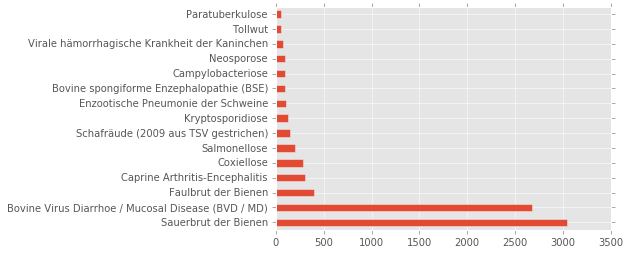

In [79]:
worst_diseases = df['tierseuche'].value_counts().head(15)
worst_diseases.plot(kind='barh')

## What were the days with the most reported incidies?

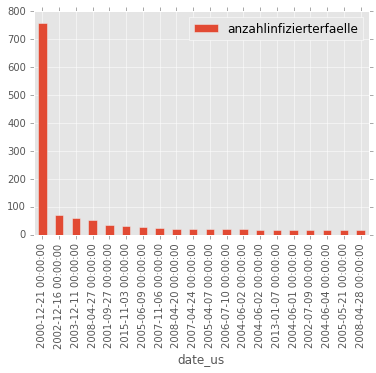

In [58]:
plt.style.use('ggplot')
most_important = df.sort_values(by='anzahlinfizierterfaelle', ascending=False).head(20)
most_important.plot(kind='bar', x='date_us', y='anzahlinfizierterfaelle')

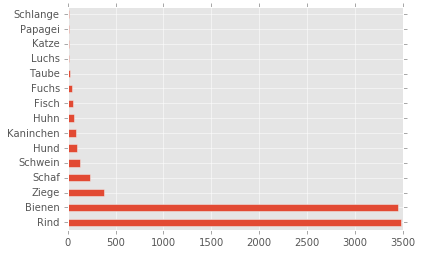

In [82]:
sickest_animals = df['tierart'].value_counts().head(15)
sickest_animals.plot(kind='barh')